In [1]:
from image_segmentation.model import image_segmentation
from edge_detection.teed.model import edge_detection
from edge_smoothing.model import edge_smoothing
from convert_svg.model import convert_svg
from edge_detection.canny.model import edge_detection as canny_edge
import matplotlib.pyplot as plt
import cv2
import io
import numpy as np
from PIL import Image

In [2]:
image_path = '../public/bear_fishing.jpg'
with open(image_path, 'rb') as f:
    image_bytes = f.read()

In [3]:
edge_bytes, edge_image = canny_edge(image_bytes)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [4]:
print(edge_image)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


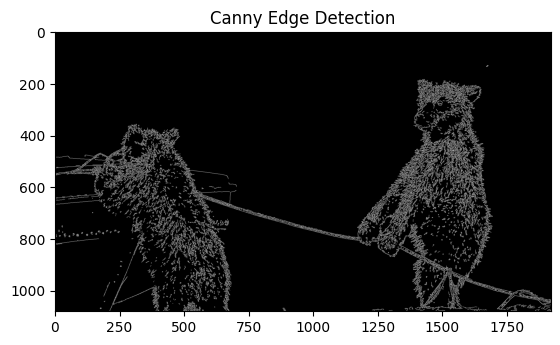

In [5]:
plt.imshow(edge_image, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

In [6]:
teed_output, teed_edges = edge_detection(image_bytes)

['bear.png']: torch.Size([1, 3, 1080, 1920])
['image.png']: torch.Size([1, 3, 1080, 1920])


In [7]:
print(teed_edges.shape)

(1080, 1920)


In [8]:
print(teed_edges)

[[247 243 255 ... 244 235 250]
 [243 245 255 ... 251 233 250]
 [255 255 255 ... 255 255 255]
 ...
 [149  99 198 ...  89 109 208]
 [195 119 183 ... 174 204 247]
 [245 229 235 ... 243 252 252]]


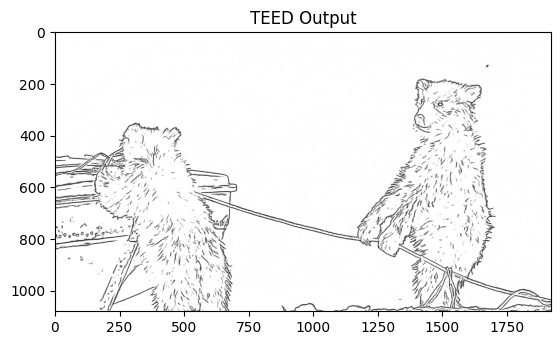

In [9]:
plt.imshow(teed_edges, cmap='gray')
plt.title('TEED Output')
plt.show()

### Invert Teed Output

In [10]:
inverted_teed = 255 - teed_edges

In [11]:
print(inverted_teed)

[[  8  12   0 ...  11  20   5]
 [ 12  10   0 ...   4  22   5]
 [  0   0   0 ...   0   0   0]
 ...
 [106 156  57 ... 166 146  47]
 [ 60 136  72 ...  81  51   8]
 [ 10  26  20 ...  12   3   3]]


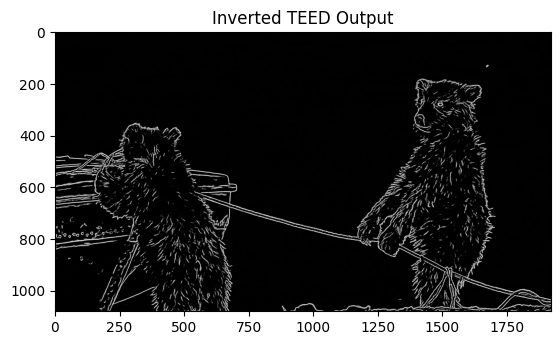

In [13]:
plt.imshow(inverted_teed, cmap='gray')
plt.title('Inverted TEED Output')
plt.show()

### Apply Edge Smoothing

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x32de0c9a0>

In [15]:
is_success, im_buf_arr = cv2.imencode(".png", inverted_teed)
inverted_binary_data = im_buf_arr.tobytes()

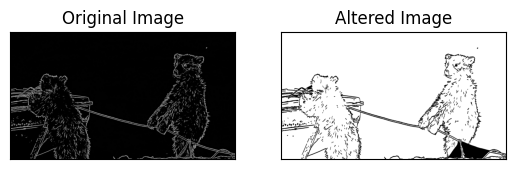

In [16]:
smoothed_image = edge_smoothing(inverted_binary_data)